# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.patches import Rectangle


from PIL import Image



from utils import get_dataset

import tensorflow as tf
import numpy as np

%matplotlib inline

In [2]:
#dataset = get_dataset("/home/workspace/data/waymo/training_and_validation/*.tfrecord")
dataset_test = get_dataset("/home/workspace/data/test/*.tfrecord")
dataset_train = get_dataset("/home/workspace/data/train/*.tfrecord")
dataset_val = get_dataset("/home/workspace/data/val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 3
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 75
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 22


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(instance):
    # Read Variables from an instance from the batch
    name    = instance['filename']
    img     = instance['image'].numpy()
    img_shape = img.shape
    bboxes   = instance['groundtruth_boxes'].numpy()
    classes = instance['groundtruth_classes'].numpy()
    
    #Display the information of the tfrecord
    print('#########################################TFrecord Information#########################################')
    print('Name of the TFrecord: {}'.format(instance['filename']))
    print('The shape of the image is: {}'.format(img_shape))
    print('The are {} boxes in the image:'.format(len(bboxes)))
    print('The are {} objects in the image:'.format(len(classes)))
    
    _, ax = plt.subplots(1,figsize=(20, 10))
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
    
    #Draw the bounding boxes around the class object
    for cl, bb in zip(classes, bboxes):
        y1, x1, y2, x2 = bb
        y1 = y1*img_shape[0]
        x1 = x1*img_shape[1]
        y2 = y2*img_shape[0]
        x2 = x2*img_shape[1]
        rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
        ax.add_patch(rec)
        
    # Plot the image with its corresponding bounding boxes
    imgplot = plt.imshow(img)
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10927752430968246422_4940_000_4960_000_with_camera_labels_10.tfrecord'
The shape of the image is: (640, 640, 3)
The are 41 boxes in the image:
The are 41 objects in the image:


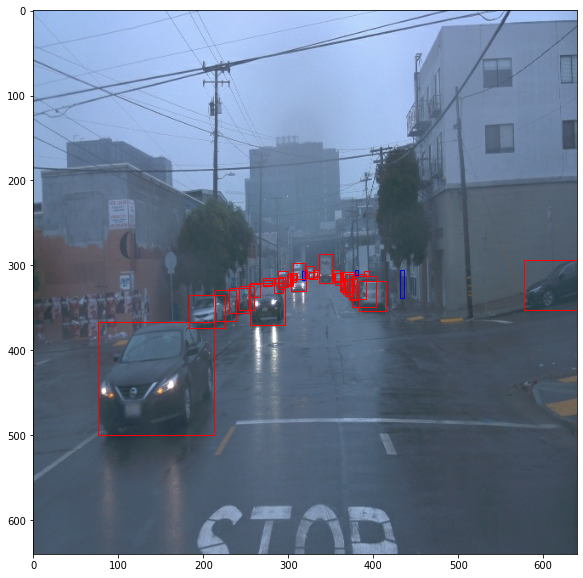

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11139647661584646830_5470_000_5490_000_with_camera_labels_80.tfrecord'
The shape of the image is: (640, 640, 3)
The are 4 boxes in the image:
The are 4 objects in the image:


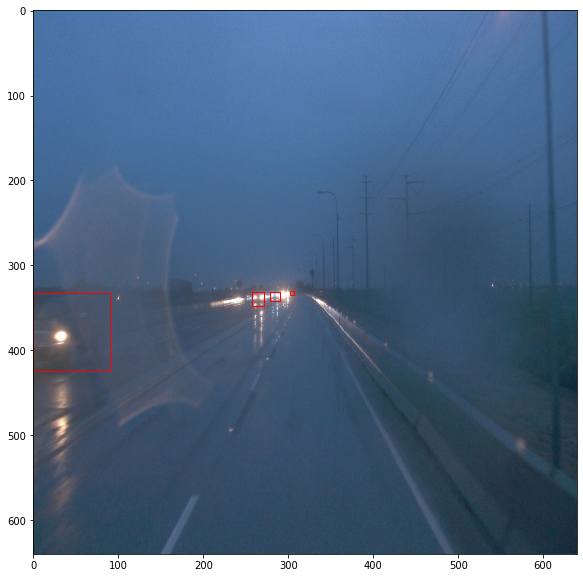

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10017090168044687777_6380_000_6400_000_with_camera_labels_100.tfrecord'
The shape of the image is: (640, 640, 3)
The are 13 boxes in the image:
The are 13 objects in the image:


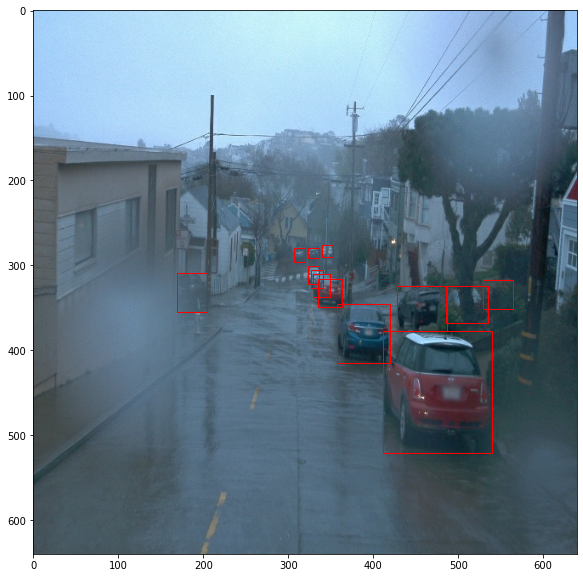

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10964956617027590844_1584_680_1604_680_with_camera_labels_60.tfrecord'
The shape of the image is: (640, 640, 3)
The are 8 boxes in the image:
The are 8 objects in the image:


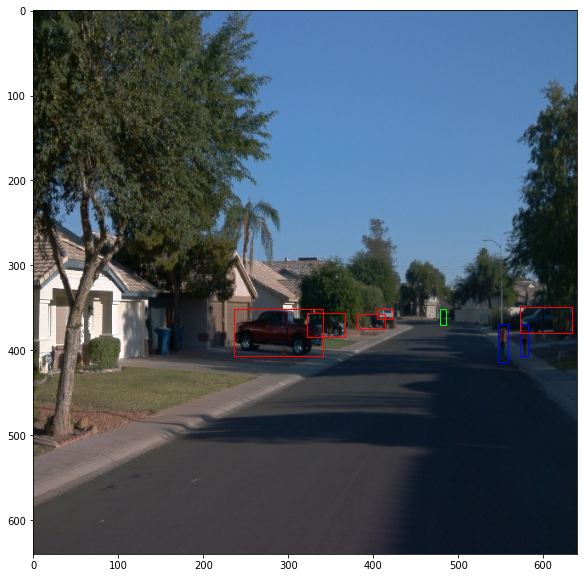

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11454085070345530663_1905_000_1925_000_with_camera_labels_170.tfrecord'
The shape of the image is: (640, 640, 3)
The are 4 boxes in the image:
The are 4 objects in the image:


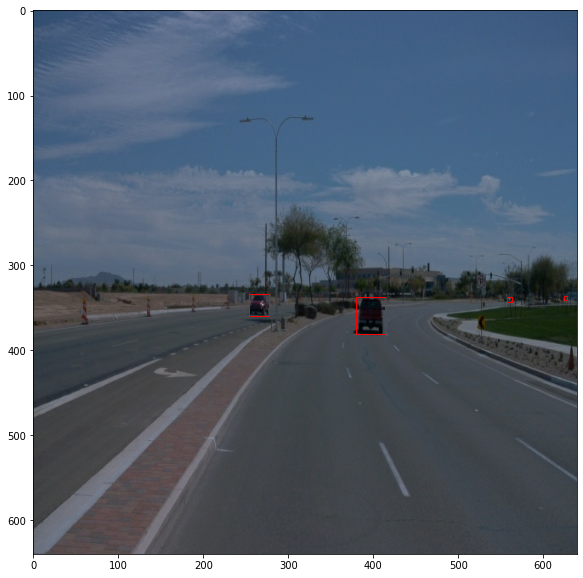

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-1146261869236413282_1680_000_1700_000_with_camera_labels_50.tfrecord'
The shape of the image is: (640, 640, 3)
The are 36 boxes in the image:
The are 36 objects in the image:


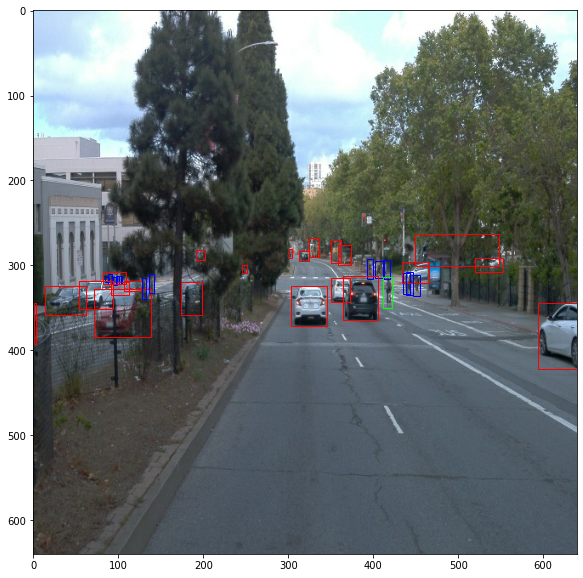

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10734565072045778791_440_000_460_000_with_camera_labels_40.tfrecord'
The shape of the image is: (640, 640, 3)
The are 1 boxes in the image:
The are 1 objects in the image:


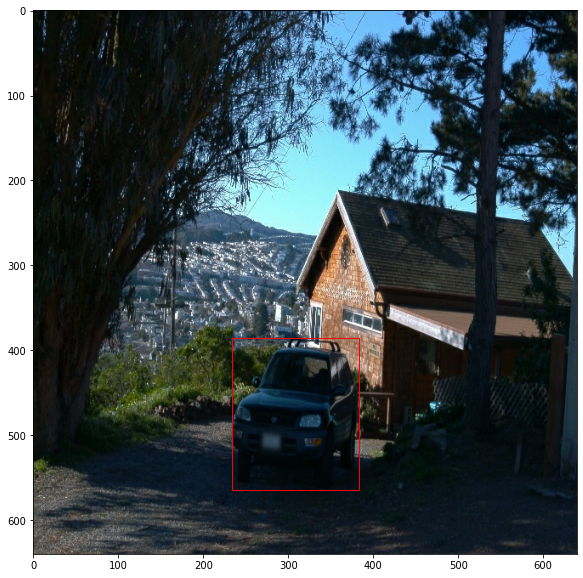

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10596949720463106554_1933_530_1953_530_with_camera_labels_40.tfrecord'
The shape of the image is: (640, 640, 3)
The are 9 boxes in the image:
The are 9 objects in the image:


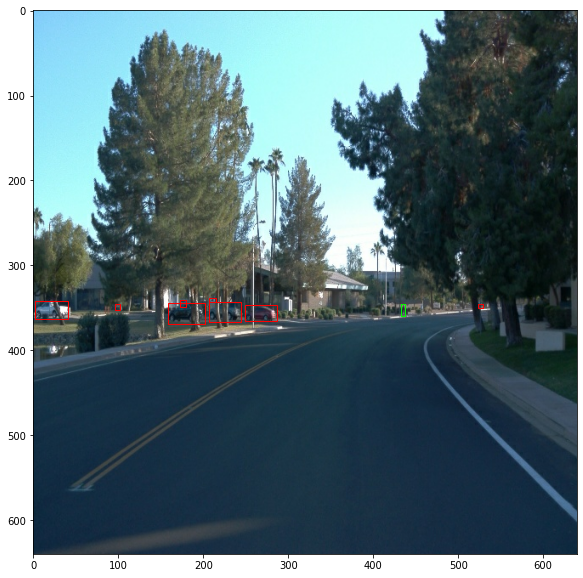

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-11718898130355901268_2300_000_2320_000_with_camera_labels_170.tfrecord'
The shape of the image is: (640, 640, 3)
The are 28 boxes in the image:
The are 28 objects in the image:


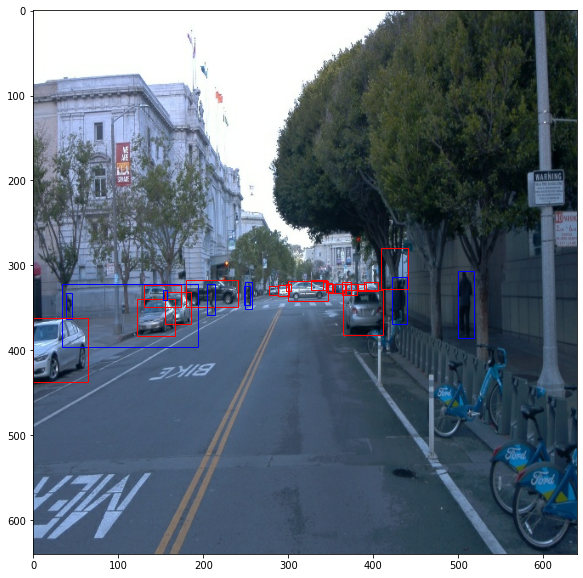

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10664823084372323928_4360_000_4380_000_with_camera_labels_150.tfrecord'
The shape of the image is: (640, 640, 3)
The are 38 boxes in the image:
The are 38 objects in the image:


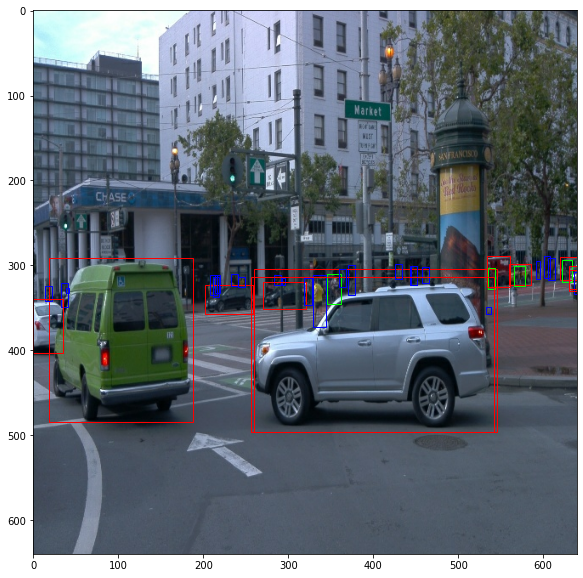

In [4]:
# Take 10 batches from the dataet
batches = dataset_train.take(10)
# Loo for each dataset
for batch in batches:
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

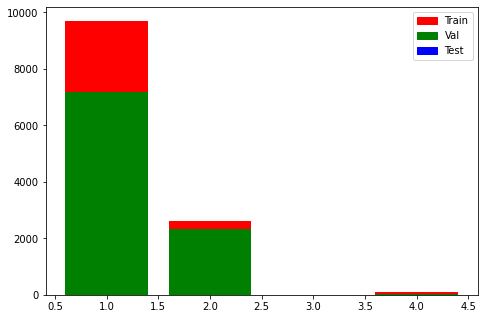

In [25]:
def count_classes(instance, veh_count, ped_count, cyc_count):
    classes= instance['groundtruth_classes'].numpy()
    for i in classes:
        if i ==1:
            veh_count +=1
        elif i == 2:
            ped_count +=1
        else:
            cyc_count +=1
            
    return veh_count, ped_count, cyc_count


#Display figures for 100 samples
# Take 10 batches from the dataset
batches_testset = dataset_test.take(500)
batches_train = dataset_train.take(500)
batches_val = dataset_val.take(500)

#Initialize counter values
veh_counter_test, ped_counter_test, cyc_counter_test = 0,0,0
veh_counter_train, ped_counter_train, cyc_counter_train = 0,0,0
veh_counter_val, ped_counter_val, cyc_counter_val = 0,0,0

# Loop for each dataset_test
for batch in batches_testset:
    veh_count, ped_count, cyc_count =  count_classes(batch,0,0,0)
    veh_counter_test += veh_count
    ped_counter_test += ped_count
    cyc_counter_test += cyc_count
    
# Loop for each dataset_train
for batch in batches_train:
    veh_count, ped_count, cyc_count =  count_classes(batch,0,0,0)
    veh_counter_train += veh_count
    ped_counter_train += ped_count
    cyc_counter_train += cyc_count
    
# Loop for each dataset_val
for batch in batches_val:
    veh_count, ped_count, cyc_count =  count_classes(batch,0,0,0)
    veh_counter_val += veh_count
    ped_counter_val += ped_count
    cyc_counter_val += cyc_count
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = [1,2,4]

vals_test = [veh_counter_test, ped_counter_test, cyc_counter_test]
vals_train = [veh_counter_train, ped_counter_train, cyc_counter_train]
vals_val = [veh_counter_val, ped_counter_val, cyc_counter_val]

ax.bar(labels,vals_test,color='b')
ax.bar(labels,vals_train, color='r')
ax.bar(labels,vals_val,color='g')

colors = {'Train':'red', 'Val':'green', 'Test':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

